In [1]:
import random
import time

import scipy.linalg
import IPython
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

def normalize(W):
    m,n = W.shape
    if m >= n:
        return scipy.linalg.orth(W)
    else:
        return scipy.linalg.orth(W.T).T

def subspace_dist(M,N,r):
    U,D,V = np.linalg.svd(N)
    Nr = U[:,0:r]#@np.diag(D[0:r])@V[0:r,:]
    NrP = Nr@np.linalg.pinv(Nr)
    MP = M@np.linalg.pinv(M)
    return np.linalg.norm(MP-NrP)/np.linalg.norm(NrP)
    
d = 20
r = 10
s = 19
n = 100
batch = 1

learning_rate = 1e-3
learning_rate_m = 1e-3

W = Variable(torch.randn(r,d), requires_grad=True)
V = Variable(torch.randn(d,r), requires_grad=True)
Xm = Variable(torch.randn(d-s,n), requires_grad=True)

loss = torch.nn.MSELoss(size_average=False)#

Vtrue = normalize(np.random.randn(d, r))
Xtrue = Vtrue@Vtrue.T@np.random.randn(d, n)@(np.eye(n) - 1./n*np.ones(n))
Xtrue = Variable(torch.Tensor(Xtrue))

omegas = [torch.LongTensor(sorted(np.random.choice(d, s, replace=False).tolist())) for i in range(n)]
momegas = [torch.LongTensor(sorted(list(set(range(d)) - set(o_d)))) for o_d in omegas]

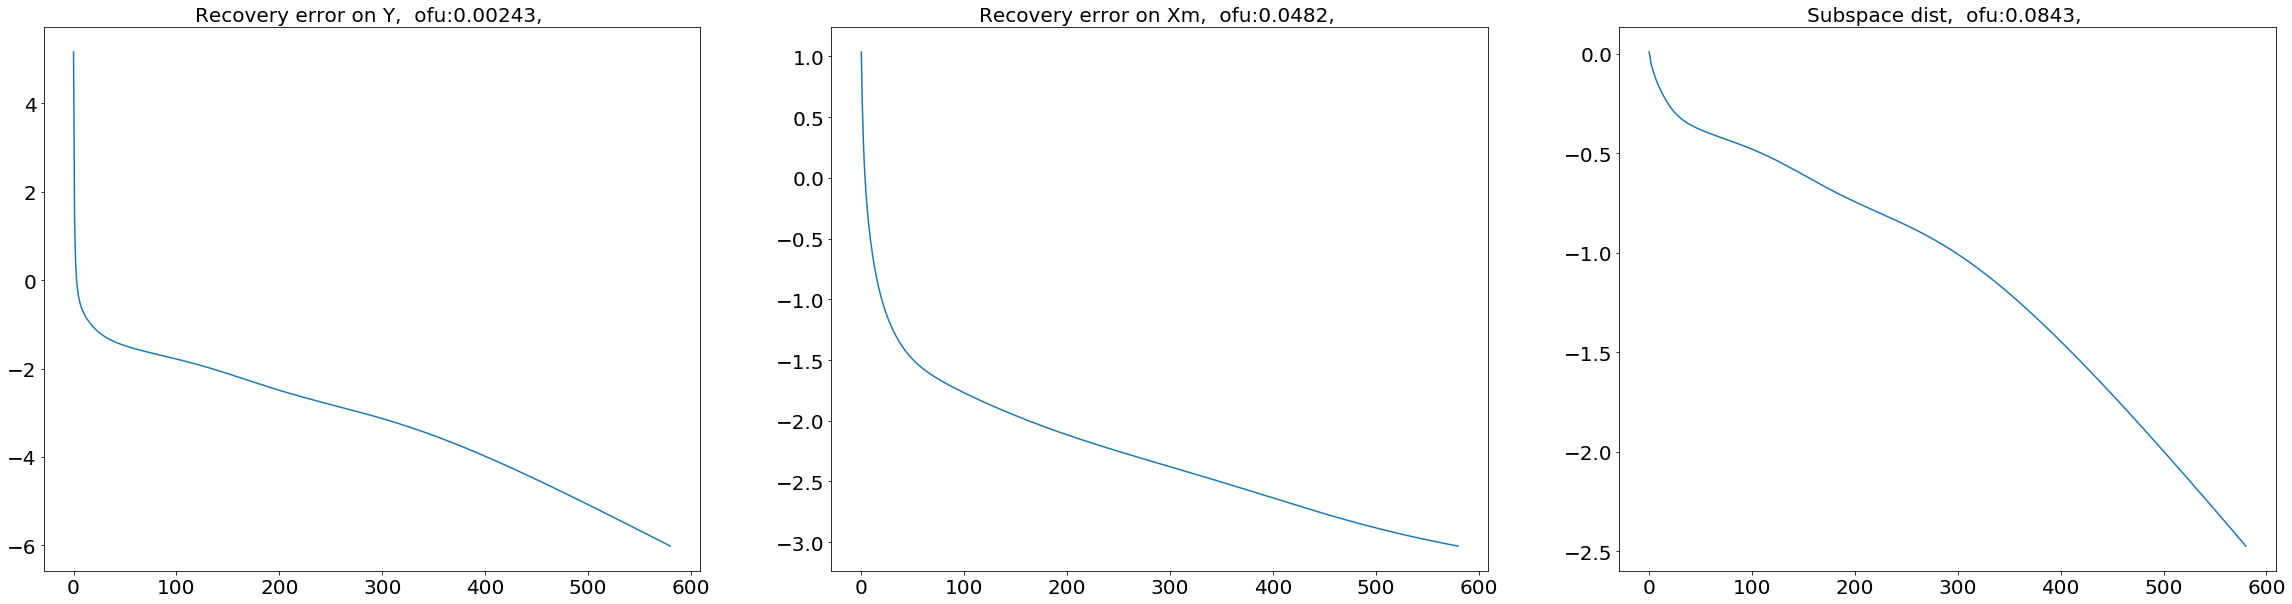

KeyboardInterrupt: 

In [2]:
losses = []
x_recovery = []
subspace_dists = []
p = np.random.permutation(range(n))
for t in np.arange(0,80000, batch):
    i = t%n
    output = loss(V.mv(W[:,omegas[i]]@Xtrue[:,i][omegas[i]]+W[:,momegas[i]]@Xm[:,i])[omegas[i]], 
                Xtrue[:,i][omegas[i]])
    output.backward()
    W.data -= learning_rate*W.grad.data
    V.data -= learning_rate*V.grad.data
    
    for j in range(10):
        output = loss(V.mv(W[:,omegas[i]]@Xtrue[:,i][omegas[i]]+W[:,momegas[i]]@Xm[:,i])[omegas[i]], 
                      Xtrue[:,i][omegas[i]])
        output.backward() 
        Xm.data -= learning_rate_m*Xm.grad.data 
        Xm.grad.data.zero_()
    
    W.grad.data.zero_()
    V.grad.data.zero_()
    Xm.grad.data.zero_()
    
    if t%n == 0:
        l = 0
        xx = 0
        no = 0; nm=0
        for j in range(n):
            l += loss(V.mv(torch.mv(W[:,omegas[j]],Xtrue[:,j][omegas[j]])+torch.mv(W[:,momegas[j]],Xm[:,j]))[omegas[j]], 
                      Xtrue[:,j][omegas[j]])
            xx += loss(Xm[:,j], Xtrue[:,j][momegas[j]])
            no += Xtrue[:,j][omegas[j]].norm()**2
            nm += Xtrue[:,j][momegas[j]].norm()**2
        subspace_dists.append(subspace_dist(V.data, Xtrue.data, r))
        losses.append(l.data[0]/no.data[0])
        x_recovery.append(xx.data[0]/nm.data[0])
    
        
        IPython.display.clear_output(True)
        plt.figure(figsize=[40, 10])
        plt.subplot(131)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(losses))
        plt.title('Recovery error on Y,  ofu:{0:.3g}, '.format(losses[-1]), fontsize=20)
        
        plt.subplot(132)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(x_recovery))
        plt.title('Recovery error on Xm,  ofu:{0:.3g}, '.format(x_recovery[-1]), fontsize=20)
        
        plt.subplot(133)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(subspace_dists))
        plt.title('Subspace dist,  ofu:{0:.3g}, '.format(subspace_dists[-1]), fontsize=20)

        plt.show()

In [ ]:
W1 = W[:, omegas[i]]
W2 = W[:, momegas[i]]
V1 = V[omegas[i]]
torch.inverse(W2.t()@V1.t()@V1@W2)@W2.t()@V1.t()@(Xo[:,i]-V1@W1@Xo[:,i])

In [ ]:
Xm.data[:, 1:10]

In [ ]:
Xtrue[:,1][momegas[1]]

In [ ]:
no

In [ ]:
x_recovery

In [ ]:
W.grad.data

In [ ]:
x = Variable(torch.zeros(5,1))
y = Variable(torch.ones(5,1))
loss(x,y)

In [ ]:
np.sqrt(5)

In [ ]:
xx

In [ ]:
    #W1 = W[:, omegas[i]]
    #W2 = W[:, momegas[i]]
    #V1 = V[omegas[i],:]
#    x1 = Xtrue[:,i][omegas[i]]
#    Xm.data[:, i] = (torch.inverse(W2.t()@V1.t()@V1@W2)@W2.t()@V1.t()@(x1-V1@W1@x1)).data
 